# Existen 3 buenos metodos para optimizar el modelo en forma de backpropagation

#### ADAM
#### SGD
#### rmsPROP

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
import cv2
import numpy as np
import glob
import os
from random import shuffle

## creamos la distribucion para la prueba TOMANDO EN CUENTA SOLO 1000 IMAGENES

In [2]:
X_train=[]
X_test=[]
Y_test=[]
Y_train=[]
dataTr=[]
for filename in glob.glob(os.path.join('data/train/malignant','*.jpg')):
    dataTr.append([1,cv2.imread(filename)])
for filename in glob.glob(os.path.join('data/train/benign','*.jpg')):
    dataTr.append([0,cv2.imread(filename)])

In [3]:
shuffle(dataTr)
print("en total tenemos: "+str(len(dataTr))+ " imagenes dentro de la carpeta train")

en total tenemos: 2637 imagenes dentro de la carpeta train


In [4]:
porcion1=dataTr[0:700]
porcion2=dataTr[701:1001]
print("para entrenamiento tendremos: "+str(len(porcion1))+ " imagenes de la carpeta de train")
print("para prueba tendremos: "+str(len(porcion2))+ " imagenes de la carpeta de test")

para entrenamiento tendremos: 700 imagenes de la carpeta de train
para prueba tendremos: 300 imagenes de la carpeta de test


In [5]:
def particion(datos):
    imagenes=[]
    etiquetas=[]
    for i,j in datos:
        imagenes.append(j)
        etiquetas.append(i)
    imagenes=np.array(imagenes)
    etiquetas=np.array(etiquetas)
    return (imagenes,etiquetas)

In [6]:
x_e,y_e=particion(porcion1)
x_p,y_p=particion(porcion2)

# CREAMOS LAS CAPAS DE LA CONVOLUCION Y RN

In [7]:
def creacion_modelo():
    modelo=Sequential()
    modelo.add(Convolution2D(32,(3,3),input_shape=(224,224,3),activation='relu'))
    modelo.add(MaxPooling2D(pool_size=((2,2))))
    modelo.add(Flatten())
    modelo.add(Dense(128,activation='relu'))
    modelo.add(Dense(50,activation='relu'))
    modelo.add(Dense(1,activation='sigmoid'))
    return modelo

## Importamos la libreria de KERAS donde se almacenan los metodos de Descenso de Gradiente

In [8]:
from tensorflow import keras

#### pondremos el valor que biene por defecto en el learning rate que es del 0.002

In [9]:
lr=0.0009

In [10]:
def validacion(x_e,y_e,x_p,y_p,model,epocas):
    entre=model.fit(x_e,y_e,batch_size=32,epochs=epocas,validation_data=(x_p,y_p))
    a=model.evaluate(x_p,y_p)
    return a[1]

In [11]:
def evaluacion(modelo,porcentaje,nombre,v1,v2):
    prediccion=0
    epocas=1
    while(True):
        if prediccion < porcentaje:
            prediccion=(validacion(x_e,y_e,x_p,y_p,modelo,1))*100
            epocas +=1
            v1.append(epocas-1)
            v2.append(prediccion)
        else:
            print("==> Para el metodo "+nombre+" se utilizo: "+str(epocas-1)+" epocas para llegar a mas del "+str(porcentaje)+"% de acertividad")
            break   

## metodo ADAM

In [45]:
modelo1=creacion_modelo()

In [46]:
modelo_adam = keras.optimizers.Adam(learning_rate=lr)
modelo1.compile(optimizer=modelo_adam,loss='binary_crossentropy',metrics=['accuracy'])

In [47]:
v_eA=[]
v_aA=[]
evaluacion(modelo1,80,"ADAM",v_eA,v_aA)

Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 3ms/sample - loss: 211.2773 - acc: 0.5433
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 3ms/sample - loss: 27.3445 - acc: 0.7433
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 3ms/sample - loss: 11.9206 - acc: 0.7533
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 3ms/sample - loss: 32.8316 - acc: 0.7767
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 3ms/sample - loss: 12.0684 - acc: 0.7800
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 3ms/sample - loss: 4.8849 - acc: 0.8033
==> Para el metodo ADAM se utilizo: 6 epocas para llegar a mas del 80% de acertividad


## metodo SGD

In [ ]:
modelo2=creacion_modelo()

In [ ]:
modelo_sgd = keras.optimizers.SGD(learning_rate=lr)
modelo2.compile(optimizer=modelo_sgd,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
v_eS=[]
v_aS=[]
evaluacion(modelo2,80,"SGD",v_eS,v_aS)

## metodo RMSprop

In [51]:
modelo3=creacion_modelo()

In [52]:
modelo_RMSprop = keras.optimizers.RMSprop(learning_rate=lr)
modelo3.compile(optimizer=modelo_RMSprop,loss='binary_crossentropy',metrics=['accuracy'])

In [53]:
v_eR=[]
v_aR=[]
evaluacion(modelo3,80,"RMSprop",v_eR,v_aR)

Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 2233.8271 - acc: 0.4300
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 354.2288 - acc: 0.5200
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 23.7308 - acc: 0.7700
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 18.8361 - acc: 0.7633
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 15.8083 - acc: 0.6700
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 3.9609 - acc: 0.7700
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.4467 - acc: 0.8233
==> Para el metodo RMSprop se utilizo: 7 epocas para llegar a mas de

## Graficas respecto a los metodos de optimizacion de RMSProp y ADAM

In [37]:
%matplotlib inline
import matplotlib.pyplot as mp

In [54]:
print(v_aA)

[54.333335161209106, 74.33333396911621, 75.3333330154419, 77.66666412353516, 77.99999713897705, 80.33333420753479]


In [55]:
print(v_aR)

[43.00000071525574, 51.99999809265137, 76.99999809265137, 76.33333206176758, 67.00000166893005, 76.99999809265137, 82.33333230018616]


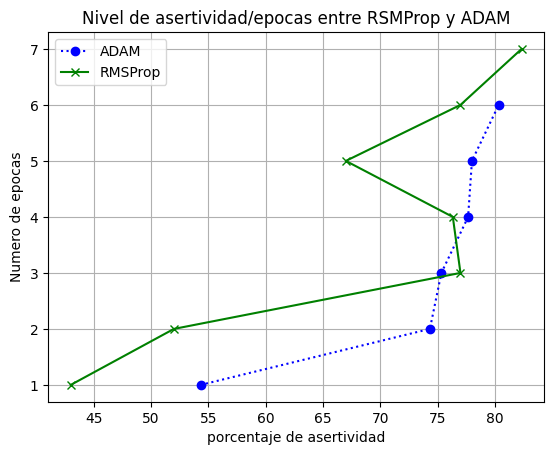

In [64]:
mp.plot(v_aA,v_eA, marker='o', linestyle=':', color='b', label = "ADAM")
mp.plot(v_aR,v_eR, marker='x', linestyle='-', color='g', label = "RMSProp")

#mp.xticks(np.arange(70,100,2))
#mp.yticks(np.arange(0,4,1))
mp.xlabel("porcentaje de asertividad")
mp.ylabel("Numero de epocas")
mp.legend(loc="upper left")
mp.title("Nivel de asertividad/epocas entre RSMProp y ADAM")
mp.grid(True)
mp.show()

In [63]:
print("asertividad del metodo ADAM: "+str(round(v_aA[-1],1))+"% alcanzado en: "+str(v_eA[-1])+ " epocas.")
print("asertividad del metodo RSMProp: "+str(round(v_aR[-1],1))+"% alcanzado en: "+str(v_eR[-1])+ " epocas.")

asertividad del metodo ADAM: 80.3% alcanzado en: 6 epocas.
asertividad del metodo RSMProp: 82.3% alcanzado en: 7 epocas.
